
# Project: No_show_appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments or not.
> A number of characteristics about the patient are included in each row.
This includes :

>Scheduled Day- this tells us on what day the patient set up their appointment.

>Neighborhood- Patients location

>Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>Patient Id - gives information about the patient identity number 

>Appoinment Id -indicates the appoinment id number 

>Gender - indicates Male/Female

>Appoinment Day - this indicates the day the patient should see the doctor

>Age - ranging from (-1 t0 115)

>Sms_received - If patients got a text messsage invite

> No-show

>Types of Diseases of patient includes (Hypertension,Diabeties,Alchololism,Handicap)
>
> **NOTE**:  for this dataset,if the patient showed up to their appointment **NO**, and **YES** if they did not show up.

### Questions  for No-Show Data Set Analysis

> Does Gender Affect showing up for Appointment?

>Does Scholarship affect  showing  up for Appointment

>Does Receiving Sms notification affect showing up for appointment?

>Does Age affect showing up for Appointment?

>Does the day of the week affect showing up for appointment?


In [1]:
#import necessary libraries for data manipulation and visualization


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline



In [2]:
# Load your data into jupyter console


df = pd.read_csv('C:\\Users\\USER\\Downloads\\project1\\noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

In [3]:
#returns the datatypes of each columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
#This prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape  #These shows a tuple that consists of 110527 records  and 18 columns

(110527, 14)

In [6]:
#   types and look for instances of missing or possibly errant data.
df.isnull().any()


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool



The no-show appointment dataset contains **110527 records** and the total of **14 columns** 
There are 5 object data type(string),8 int64 and 1 float.

**The AppointmentDay and Scheduled Day** should be in Date format.

In [7]:
#Convert The Data type for AppointmentDay column to Datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 


#Extract the month of appointment                                   
df['Appointment_Month'] =df['AppointmentDay'].dt.month_name()


#Extract the Day of Appointment
df['Appointment_Day']=df['AppointmentDay'].dt.day_name()

In [8]:
#converting Gender, Scholarship, Diabetes, Alcoholism , Handicap and sms_received to categorical datatype


df.iloc[:,6:13]=df.iloc[:,6:13].astype('category')

There are no duplicate rows in this dataset. Yipee!!

In [9]:
#counts numbers of unique values 
df.nunique(axis = 0)

PatientId             62299
AppointmentID        110527
Gender                    2
ScheduledDay         103549
AppointmentDay           27
Age                     104
Neighbourhood            81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2
Appointment_Month         3
Appointment_Day           6
dtype: int64

In [10]:
#General Descriptive Statistics of numerical columns
df.describe()

,PatientId,AppointmentID,Age
count,1.105270e+05,1.105270e+05,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874
std,2.560949e+14,7.129575e+04,23.110205
min,3.921784e+04,5.030230e+06,-1.000000
25%,4.172614e+12,5.640286e+06,18.000000
50%,3.173184e+13,5.680573e+06,37.000000
75%,9.439172e+13,5.725524e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


There are a total number of 62299 patients which consists of two genders(Male and Female).Patients from 81 Unique locations visits this Brazil Clinic. The Scholarship,Hypertension,Diabetes,Alcoholism,Handicap and Sms_received are categorical varaibles in 1's and 0's which could mean **Yes** or **No** .The Handicap column has 5 different categories

>The PatientId Column isn't providing much information about the dataset,hence the need to drop it

> The Minimum Age on the Age column is -1 oops! and the maximum age is 115,looks to me like an outlier . 

> The Negative Age will be dropped 

>The mean age  is 37.




In [11]:
# The Patient Id isnt giving so much information so it will be dropped

del df['PatientId']

In [12]:
# Getting to know the column names , some of the column spellings are wrong 


df = df.rename(columns={'Handcap':'Handicap' ,'Hipertension':'Hypertension','No-show':'no_show','SMS_received':'Sms_received'})

In [13]:
df.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Sms_received,no_show,Appointment_Month,Appointment_Day
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday


In [14]:
#look up nagtive values in the age column


df[df['Age']==-1]


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Sms_received,no_show,Appointment_Month,Appointment_Day
99832,5775010,F,2016-06-06T08:58:13Z,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,June,Monday


In [15]:
#delete the negative value in the age column
df.drop(index = 99832,inplace = True)

In [16]:
#confirm the negative age value is gone
df[df['Age']==-1]

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Sms_received,no_show,Appointment_Month,Appointment_Day


In [17]:
# grouping age into 5 different age groups 

df.loc[df['Age']<=2,'age_bracket']='Babies'
df.loc[df['Age'].between(3,16),'age_bracket']='Children'
df.loc[df['Age'].between(17,30),'age_bracket']='Young Adults'
df.loc[df['Age'].between(31,60),'age_bracket']='Middle_Age'
df.loc[df['Age']>61,'age_bracket']='Old'

In [18]:
df['showed']=df['no_show'].map({'Yes':0,'No':1})

In [19]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Sms_received,no_show,Appointment_Month,Appointment_Day,age_bracket,showed
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,Old,1
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,Middle_Age,1
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,Old,1
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,Children,1
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,Middle_Age,1


<a id='eda'></a>
## Exploratory Data Analysis

This data will be explored and relationship will be extracted to give detailed information on why Some Patient do not show  up on the days of their  appointments

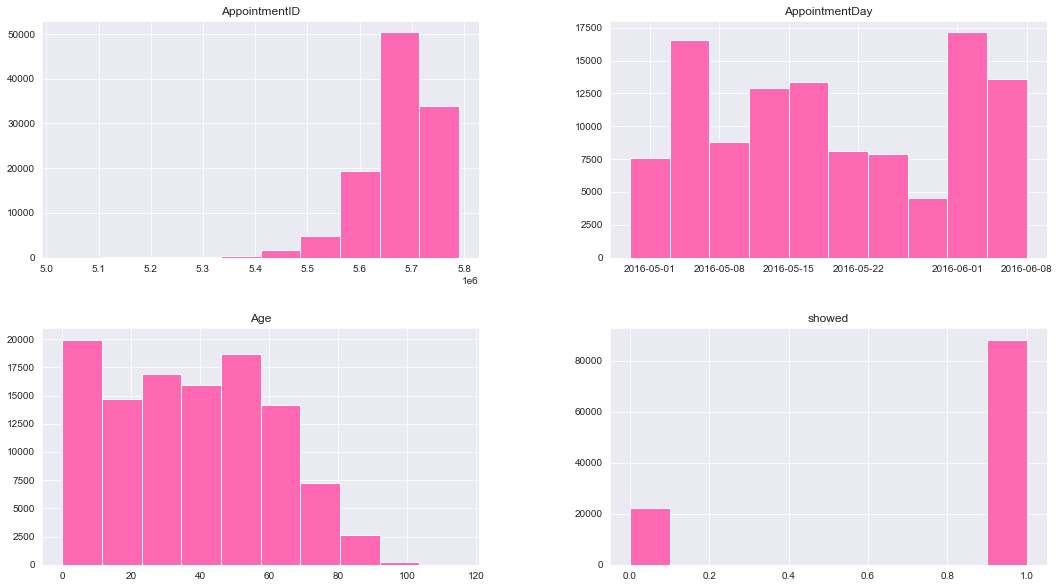

In [20]:
#plot an histogram to display the visuals of all numerical data
df.hist(figsize=(18,10),color ='hotpink');

From the visualization above , this dataset ranges between months  for the year 2016, the age ranges from 0 to just alittle above hundred. The highest values falls within 0 to 20 years.

In [21]:
# Writing a function to calculate the percentage of people that showed and those that didnt show
def percentage(n):
    total = 110527
    value =(n/total)*100
    return int(value)

In [22]:
#The total number of people showed and people that didnt show 

df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

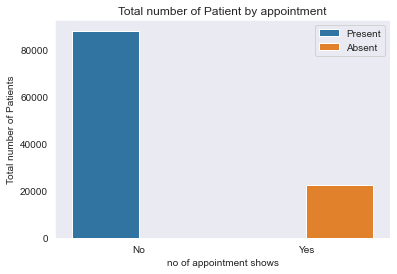

In [23]:
#creating count plots for the  total number of patients 
sns.countplot(x='no_show',hue ='no_show',data =df)
#plot the y label
plt.ylabel('Total number of Patients')
#plot the x label
plt.xlabel('no of appointment shows')
#plot the titel of the visual
plt.title('Total number of Patient by appointment')
label =['Present','Absent']
plt.legend(label);


In [24]:
percentage(88208)

79

From my observation of the visual above, a total number of 88208 patients which makes up of **79%** of the total patient showed up for their appointments , and **21%** who didnt attend.

Exploring further to know why these patients do not turnup for their appoinments 

## Research Question 1: Does Gender Affect showing up for Appointment?

In [25]:
#calculating the total gender count

df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [26]:
#percentage of the female gender
percentage(71840)

64

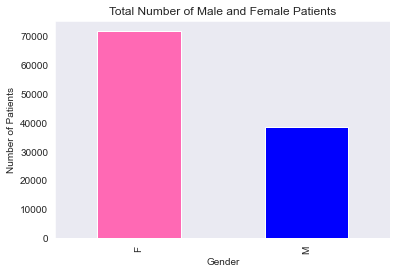

In [27]:
#plotting  a bar graph of the total numnber of female and male patients

df['Gender'].value_counts().plot(kind ='bar',color =['hotpink','blue'])
# plotting title of the graph
plt.title('Total Number of Male and Female Patients')
#plotting the x-axis label
plt.xlabel("Gender")
#plotting the y-axis label
plt.ylabel('Number of Patients');

These visualization tells us that there are a total ratio of **64%** of the total patients were female **36%** males

In [28]:
#calculating the total gender count against the number of patients that showed up for the appointment

df.groupby('Gender')['no_show'].value_counts()

Gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [29]:
#calculating the female percentage for those that showed up
percentage(57246)

51

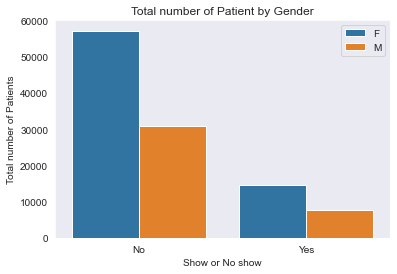

In [30]:
#plotting a countplot for patients that showed up for their appointment by gender
sns.countplot(x='no_show',hue ='Gender',data =df)
#plotting the y label
plt.ylabel('Total number of Patients')
#plotting the x label
plt.xlabel('Show or No show')
#plotting the title of the visual
plt.title('Total number of Patient by Gender')
label =['F','M']
plt.legend(label);


From the visualization above, **28%** of the Male show up for their appointment and **51%**Female showed up for their appointment too.
But, there are also higher number of females not showing up aswell for their appoinments

## Research Question 2:  Does Scholarship affect  showing  up for Appointment


In [31]:
#calculating the total scholarship count
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [32]:
percentage(10861)

9

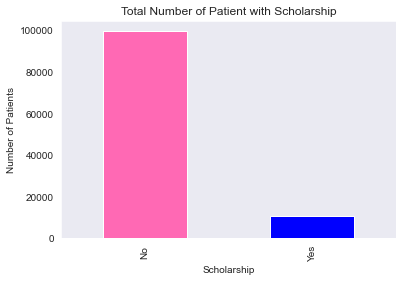

In [33]:
#plotting  a bar graph of the total number of scholarships
df['Scholarship'].value_counts().plot(kind ='bar',color =['hotpink','blue'])
#plot the title pf the visual
plt.title('Total Number of Patient with Scholarship')
#plot the x label
plt.xlabel("Scholarship")
#plot the y label
plt.ylabel('Number of Patients')
plt.xticks([0,1],['No','Yes']);

These visualization tells us that **9%** of the Patients were offered health scholarship 

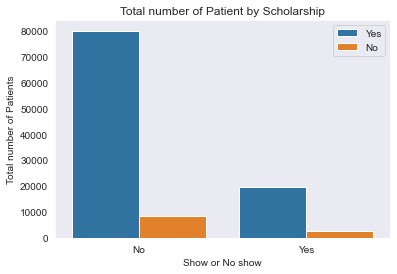

In [34]:
#plotting a countplot for patients that showed up for their appointment by scholarship
sns.countplot(x='no_show',hue ='Scholarship',data =df)
#plotting the ylabel
plt.ylabel('Total number of Patients')
#plotting the x label
plt.xlabel('Show or No show')
#plotting the title of the visual
plt.title('Total number of Patient by Scholarship')
label =['Yes','No']
plt.legend(label);

In [35]:
df.groupby('Scholarship')['no_show'].value_counts()

Scholarship  no_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

From the visualization above the number of patients that got scholarship tends to show up more for their appointments  than patients who were not  given scholarship.

I can conclude that if more health scholarships are given to patients more patients will turn up their  medical apppointment.

##  Research Question 3: Does Receiving Sms notification affect showing up for appointment?


In [36]:
df['Sms_received'].value_counts()

0    75044
1    35482
Name: Sms_received, dtype: int64

In [37]:
percentage(35482)

32

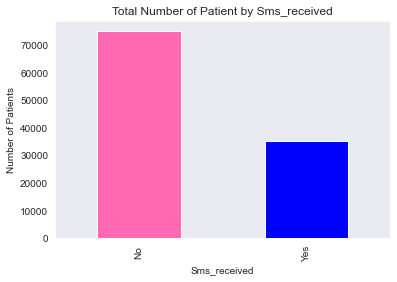

In [38]:

df['Sms_received'].value_counts().plot(kind ='bar',color =['hotpink','blue'])#plotting  a bar graph of the total numnber of female and male patientsdf['Sms_received'].value_counts().plot(kind ='bar',color =['hotpink','blue'])
plt.title('Total Number of Patient by Sms_received')
#plotting the x label
plt.xlabel("Sms_received")
#plotting the y label
plt.ylabel('Number of Patients')
plt.xticks([0,1],['No','Yes']);

Only **32%** of the total number of patients receives sms notification to remind them about their appointment **67%** were not reminded about their appointment . That fracton of population is quite low 

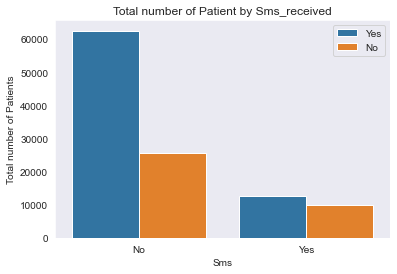

In [39]:
#plotting a countplot for patients that showed up for their appointment by Sms_received
sns.countplot(x='no_show',hue ='Sms_received',data =df)
#plotting the y label
plt.ylabel('Total number of Patients')
#plotting the x label
plt.xlabel('Sms')
#plotting the title of the visual
plt.title('Total number of Patient by Sms_received')
label =['Yes','No']
plt.legend(label);

From the visualization above, the patients that got Sms notification showed up fo their appointment more than those who didnt get the sms notification

If more notifications are sent to the patients, these might prompt them to remember to show up for their appointments more 


## Research Question 4:Does Age affect showing up for Appointment?

In [40]:
percentage(3539)

3

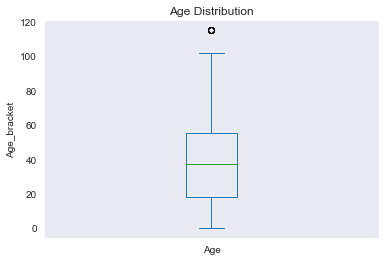

In [41]:
#creating boxplot for age distribution
df['Age'].plot(kind = 'box')
plt.ylabel('Age_bracket')

#this displaya title
plt.title('Age Distribution');

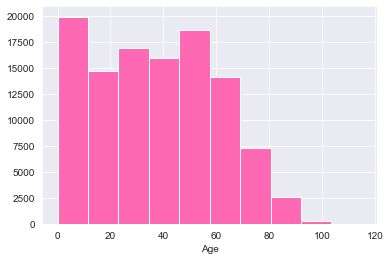

In [42]:
df['Age'].hist(color = 'hotpink')
plt.xlabel('Age');

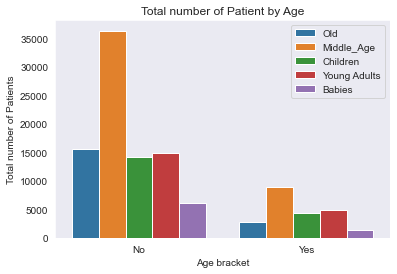

In [43]:
#plotting a countplot for patients that showed up for their appointment by Age
sns.countplot(x='no_show',hue ='age_bracket',data =df)
#plotting the y label
plt.ylabel('Total number of Patients')
#plotting the x label
plt.xlabel('Age bracket')
#plotting the title of the visual
plt.title('Total number of Patient by Age')
plt.legend();

From the Analysis above, **3%** of the patients are babies.Patients fron the  the Middle Age Bracket goes for their hospital appointments.The patients with ages 0-2 less frequently meets up for their appointments

These could be as a result of the busy schedule of their parents or guardians.

## Research Question 4:Does the day of the week affect showing up for appointment? 

In [44]:
#value count
df.Appointment_Day.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_Day, dtype: int64

In [45]:
percentage(25867)

23

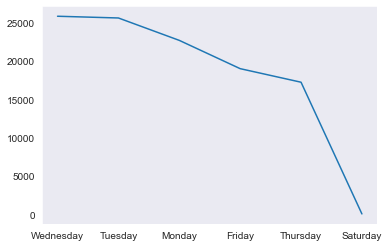

In [46]:
df['Appointment_Day'].value_counts().plot();

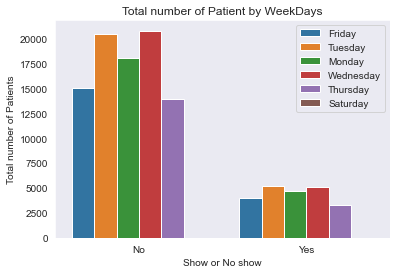

In [47]:
#plotting a countplot for patients that showed up for their appointment by days
sns.countplot(x='no_show',hue ='Appointment_Day',data =df)
#plot the y label
plt.ylabel('Total number of Patients')
#plot the x label
plt.xlabel('Show or No show')
#plot the title of the visual
plt.title('Total number of Patient by WeekDays')
plt.legend();


The visualization above shows that **23%** Patients turn up for appointment on Wedneday and Tuesday. There is also very low show up on Thursday's. There is no record of Patients on  Saturday has the least turn up day


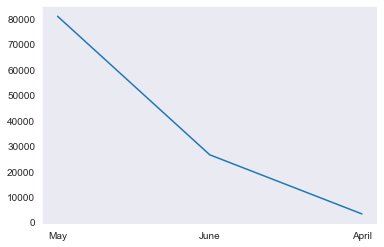

In [48]:
df['Appointment_Month'].value_counts().plot();

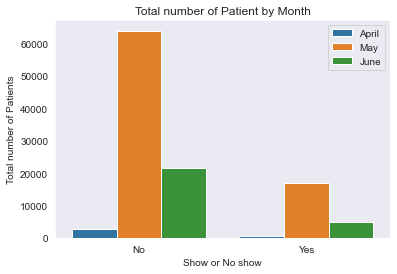

In [49]:
#plotting a countplot for patients that showed up for their appointment by Month
sns.countplot(x='no_show',hue ='Appointment_Month',data =df)
#plot the y label
plt.ylabel('Total number of Patients')
#plot the x label
plt.xlabel('Show or No show')
#plot the title of the visual
plt.title('Total number of Patient by Month')
plt.legend();


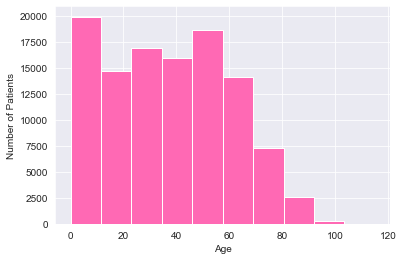

In [50]:
df['Age'].hist(color = 'hotpink')
plt.ylabel('Number of Patients')
plt.xlabel('Age');

<a id='conclusions'></a>
## Conclusions
After carefully, cleaning and analyzing the data, I came to a conclusion that there are more Female than male in this Dataset.
There are also 4 different kinds of Patients ( Diabetic, Hypertensive, Alcoholic and the Handicap). There are More Hypertesnsive Patient in the Dataset.

1.The Gender does not affect the rate of show up on appointment day as there was no significant difference found between both genders.

2.The patients that were granted Health scholarship turne up more for thei appoinment better than those who have to pay their hospital bills by themselves.

3.The Middle age turned up more for their appointment compared to other age groups.

4.Those patient that received sms notification prior their appointment day turned up more than their counterparts.






## Limitations
The dataset is for just a short perod of three month so our analysis can"t be very precise 